## Working with EEG data
Yesterday, we learned how to load basic information about CML experiments and experimental events. Today, we're going to load EEG/iEEG data that correspond to those events.

### What is EEG?
Before we get into the weeds, let's briefly review exactly what EEG is, how we collect it, and what we can learn from it. Much of this material is sources from this paper by Pesaran, et al. (2018): https://www.nature.com/articles/s41593-018-0171-8

The fundamental signal detected by any electrical brain sensor is the **field potential**, or the change in extracellular voltage induced by aggregated electrical currents across a population of neurons. In other words, as neurons communicate with one another, ions flow across channels at synapses (and along the axon during action potentials). These ionic flows set up a difference in the electrical potential between two areas of brain tissue, which is detected by a sensor placed within the brain (iEEG/sEEG), on the cortical surface (ECoG), or on the scalp (EEG). 

Typically, we refer to the **local field potential (LFP)** when we're talking about field potentials detected by electrodes inserted directly into brain tissue -- such as stereo-EEG depth electrodes -- and **electrocorticography (ECoG)** when we're talking about field potentials detected by electrodes that sit on the surface of the brain. Often, you'll find both of these types of signals in one patient. 

<br>
<center>
<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41593-018-0171-8/MediaObjects/41593_2018_171_Fig1_HTML.jpg" width=400>
</center>

The exact neural source of a field potential is not always clear, and it can depend on the placement of an electrode relative to the underlying geometry of neurons and their component parts. For example, a scalp EEG electrode is detecting a field potential generated by the activity of millions of cells in a broad area of the brain near the electrode -- and filtered through the skull and scalp -- while a depth electrode placed in the hippocampus directly records the activity from only a few thousand cells.

The synchronized activity of many cells near an electrode gives rise to an **oscillation**, or a rhythmic fluctuation of the field potential at a particular frequency. The presence of an oscillation is thought to indicate the coordinated neural activity of (or inputs to) a given region, but their origins are multifactorial. Oscillations themselves can affect the firing of neurons, making them an important phenomenon to study in the context of cognition and behavior. We'll talk more about oscillations tomorrow. 

### Invasive Monitoring for Epilepsy Surgery

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/iEEG_methods-01.jpg?raw=true" width=700>
</center>

Why do we collect EEG? Noninvasive methods, such as scalp EEG and MEG, are safe to use on healthy people. But invasive recordings such as stereo-EEG and ECoG must be justified with a clinical need. Patients with medication-resistant epilepsy come to the hospital for surgical treatment of their epilepsy, in which epileptogenic brain tissue is ablated or removed. But in order to precisely localize this tissue, patients undergo monitoring during which EEG signals are recorded intracranially for several days or weeks, until sufficient seizure events are documented. 

* **(A)** shows a craniotomy, during which a part of the skull is removed so that a grid or strip electrode can be placed on the cortical surface. This method was more common several years ago, and comprises the bulk of early RAM and pre-RAM datasets. 
* **(B)** is a CT-MRI fusion depecting a depth electrode placed in the MTL. So-called "stereo-EEG" depth electrodes are far less invasive, since even a tiny hole in the skull is sufficient to slip one of these wires through. Nowadays, many patients are exclusively stereo-EEG. 

### Load the data (same as yesterday)

In [124]:
#First, our import statements
from cmlreaders import CMLReader, get_data_index

#The "r1" database corresponds to all of the RAM subjects
df = get_data_index("r1")

#Specify which subject and experiment we want
sub = 'R1001P'
exp = 'FR1'

#Find out the sessions, localization, and montage for this subject
sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])      #note that *usually* mont and loc will be 0.
loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

#For first session...
reader = CMLReader(sub, exp, sessions[0], montage=mont, localization=loc)   #reader for loading CML data
evs = reader.load('task_events')
word_evs = evs[evs['type']=='WORD']
pairs = reader.load('pairs')

#### Load subject electrodes

In [125]:
contacts = reader.load('contacts')
pairs = reader.load('pairs')  #loading all bipolar pairs, but use 'contacts' for non-rereferenced data
pairs[:10]

,contact_1,contact_2,label,is_stim_only,type_1,type_2,avg.dural.region,avg.dural.x,avg.dural.y,avg.dural.z,...,ind.z,is_explicit,stein.region,stein.x,stein.y,stein.z,tal.region,tal.x,tal.y,tal.z
0,2,3,LAF1-LAF2,False,S,S,rostralmiddlefrontal,-39.192639,50.946599,4.152569,...,3.955,False,NaN,NaN,NaN,NaN,NaN,-41.03220,59.643900,3.984425
1,3,4,LAF2-LAF3,False,S,S,rostralmiddlefrontal,-44.917132,42.021149,2.935475,...,2.135,False,NaN,NaN,NaN,NaN,NaN,-47.39695,50.175950,2.985235
2,4,5,LAF3-LAF4,False,S,S,parstriangularis,-51.443475,32.776203,0.906133,...,0.275,False,NaN,NaN,NaN,NaN,NaN,-52.58225,40.205850,2.020270
3,5,6,LAF4-LAF5,False,S,S,parstriangularis,-53.127559,20.610749,1.078647,...,-2.170,False,NaN,NaN,NaN,NaN,NaN,-55.65790,29.229950,0.533825
4,6,7,LAF5-LAF6,False,S,S,superiortemporal,-54.827944,9.408506,-1.535033,...,-4.580,False,NaN,NaN,NaN,NaN,NaN,-58.16045,18.282000,-0.864941
5,8,9,LPF1-LPF2,False,S,S,precentral,-24.288266,-21.993433,69.449639,...,58.145,False,NaN,NaN,NaN,NaN,NaN,-23.28825,-6.502335,75.985550
6,9,10,LPF2-LPF3,False,S,S,precentral,-34.375836,-21.925594,64.057323,...,52.900,False,NaN,NaN,NaN,NaN,NaN,-33.01185,-5.731280,69.615850
7,10,11,LPF3-LPF4,False,S,S,postcentral,-43.291239,-19.573794,57.242586,...,47.170,False,NaN,NaN,NaN,NaN,NaN,-42.69825,-4.948475,62.679950
8,11,12,LPF4-LPF5,False,S,S,postcentral,-49.751530,-16.783382,49.261240,...,40.485,False,NaN,NaN,NaN,NaN,NaN,-50.27110,-4.605505,54.716850
9,12,13,LPF5-LPF6,False,S,S,postcentral,-56.118505,-16.779853,40.019078,...,32.655,False,NaN,NaN,NaN,NaN,NaN,-56.84330,-5.308500,45.571450


Some key attributes you may need in your analyses include: 
* label: The clinical label for each electrode, as determined in the hospital
* ind.region: The anatomical region using the Desikan-Killiany atlas. 
* ind.x/y/z: Electrode coordinates in individual FreeSurfer space. 
* avg.x/y/z: Electrode coordintes in average FreeSurfer space (standardized to the average brain of our dataset). 
* tal.x/y/z or mni.x/y/z: Coordinates in Talairach or MNI space. 
* stein.region or das.region: Manually-confirmed labels for MTL subfields (mostly). Talk to me offline about getting these labels for recent subjects.

(The x axis points to the right, the y axis to the front, and the z axis up.)

* For a full description of fields in 'pairs' or 'contacts' structures, see: https://github.com/pennmem/neurorad_pipeline/blob/master/RELEASE_NOTES.md
* For more information on brain coordinate systems, see: http://www.fieldtriptoolbox.org/faq/how_are_the_different_head_and_mri_coordinate_systems_defined/

### Load EEG

Loading EEG is pretty simple -- use your reader's **'load_eeg'** method, and pass it an events dataframe, when you want to start/stop the EEG clip (in ms), and the electrodes you want. Use a **'pairs'** dataframe for bipolar data (see below) or a **'contacts'** dataframe for unrereferenced data.

* Note that events and electrodes dataframes must be passed as slices, not individual rows. So index them like 'pairs[0:1]' or 'pairs.loc[0:1]' for the first electrode pair, not 'pairs.loc[0]'. Same goes for events!
* Unrereferenced data is **not available** for subjects collected on the newer RAM ENS system. The ENS inherently records in bipolar fashion (to mitigate stimulation artifact). Passing a 'contacts' structure should yield an error if this is the case. 

In [76]:
reader.load_eeg?

Signature: reader.load_eeg(events:Union[pandas.core.frame.DataFrame, NoneType]=None, rel_start:int=None, rel_stop:int=None, scheme:Union[pandas.core.frame.DataFrame, NoneType]=None)
Docstring:
Load EEG data.

Keyword arguments
-----------------
events
    Events to load EEG epochs from. Incompatible with passing
    ``epochs``.
rel_start
    Start time in ms relative to passed event onsets. This parameter is
    required when passing events and not used otherwise.
rel_stop
    Stop time in ms relative to passed event onsets. This  parameter is
    required when passing events and not used otherwise.
scheme
    When specified, a bipolar scheme to rereference the data with and/or
    filter by channel. Rereferencing is only possible if the data were
    recorded in monopolar (a.k.a. common reference) mode.

Returns
-------
EEGContainer

Raises
------
RereferencingNotPossibleError
    When passing ``scheme`` and the data do not support rereferencing.
IncompatibleParametersError
    When b

In [127]:
#Grab EEG for the first five events from the first seven electrodes
eeg = reader.load_eeg(events=word_evs[0:5], rel_start=0, rel_stop=1600, scheme=pairs[0:7])

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


In [128]:
#The output is a CMLReaders 'EEGContainer' object, which has several attributes you can explore with TAB. 
print(eeg.shape)  #the output shape is events x electrodes x samples

#Access the EEG data with the 'data' attribute
print(eeg.data.size)

#As we'll explore later, you may want the EEG in a PTSA or MNE format:
eeg_ptsa = eeg.to_ptsa()
eeg_mne = eeg.to_mne()

(5, 7, 800)
28000


Text(0.5,1,'Sample EEG trace')

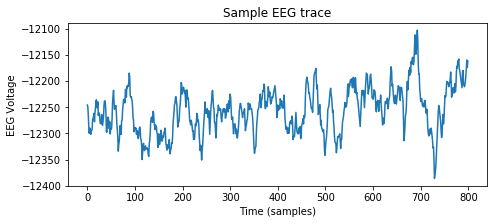

In [131]:
#Plot some example data
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg.data[2, 2, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Sample EEG trace')

This is the fundamental unit of all of the analyses you'll do in the lab -- the EEG timeseries! Whether from scalp or intracranial, our core interest is understanding the properties of these timeseries relative to interesting behavioral or cognitive events. Typically, we understand EEG signals with **spectral decomposition**, which will be covered tomorrow.

**Exercise: Get EEG data for the first five word events from all (bipolar) electrodes placed in the temporal cortex, and plot it.**

In [134]:
temporal_elecs = pairs[pairs['ind.region'].astype(str).str.contains('temporal')]
temporal_eeg = reader.load_eeg(events=word_evs[0:5], rel_start=0, rel_stop=1600, scheme=temporal_elecs)

print(temporal_eeg.shape)

(5, 8, 800)


/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


### Referencing

Electrical potentials inherently reflect some kind of differential. In the case of EEG data, the voltage fluctuations we measure really reflect a difference between an electrode of interest and a "reference" electrode placed elsewhere (such as the mastoid or an arbitrary location in the brain). As such, noise on the reference electrode -- and other sources -- can contaminate our measurement of true neural signal in the raw data. 

To solve this, it is common to "re-reference" EEG data to mitigate sources of noise. We could have a whole discussion about different ways to re-reference data, and the advantages/disadvantages of each, but there are two common ways of re-referencing I'll mention here. 

The most common re-reference used in this lab is the **bipolar** reference, in which the signal from each channel is subtracted from its neighbor. The result is an estimate of a cleaner signal that putatively reflects activity at the midpoint of the two physical recording contacts (we sometimes call this midpoint a **virtual electrode**). The bipolar reference has several advantages: (1) it's very simple to implement, (2) it typically does a good job at removing widespread noise, and (3) it ensures that your re-referenced traces reflect activity that is very close to the original electrodes. 

(One downside is that bipolar re-referencing can actually reduce your ability to detect true neural signals, or mislocalize its origin, especially if two adjancent electrodes were detecting a common source of electrical activity.)

You may also encounter the **common average** reference, in which the average signal across all electrodes (or perhaps within a predefined anatomical region) is subtracted from each. This method is less likely to destroy local signals, and also does a good job removing widespread noise or reference noise, but can potentially contaminate originally-clean electrodes with unmitigated noise from a completely different part of the brain. 

Neither method is perfect, and there are more sophisiticated approaches out there. For the sake of this tutorial, we're going to focus on the bipolar reference. But it is often nice to try different referencing schemes in your analysis to ensure that your results don't change drastically from one to the other. 

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


Text(0.5,1,'Database bipolar')

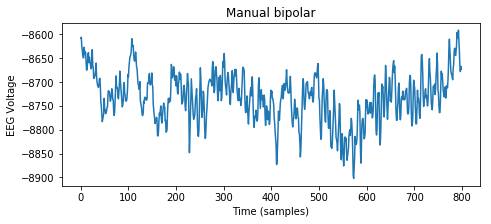

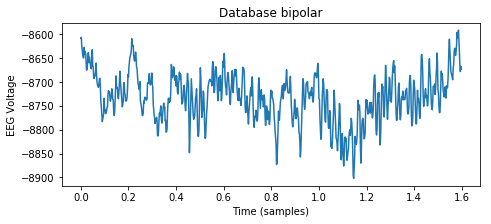

In [136]:
%matplotlib inline
import pylab as plt
import numpy as np

#Let's take a look at how bipolar referencing actually works
eeg1 = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=contacts[0:1])
eeg2 = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=contacts[1:2])
eeg_bipol = eeg1.data-eeg2.data

plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg_bipol[0, 0, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Manual bipolar')

#Does this match our database's bipolar data?
eeg = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=pairs[0:1])

#First, let's load a clip of EEG from one electrode. For that, we'll need to use our reader's 'load_eeg' method:
eeg = reader.load_eeg(events=word_evs[0:1], rel_start=0, rel_stop=1600, scheme=pairs[0:1])  #the reader requires slices, not single events

plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.arange(eeg.shape[2])/float(eeg.samplerate), eeg.data[0, 0, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Database bipolar')

## Check out some ERPs
To carry out an ERP analysis on the voltage data, we must 1. Load the desired events, 2. Filter to only encoding
events, 3. Get the voltage for all encoding events, 4. Z-Score the voltage, 5. Get a logical index of recall status, 6. Plot
the average subsequently recalled and subsequently forgotten voltage traces.

/home1/esolo/anaconda3/envs/CML/lib/python3.6/site-packages/cmlreaders/path_finder.py:238: MultiplePathsFoundWarning: Multiple files found: /protocols/r1/subjects/R1001P/experiments/FR1/sessions/0/ephys/current_processed/sources.json
/data/eeg/R1001P/eeg.noreref/params.txt returning the first file found
  warnings.warn(msg, MultiplePathsFoundWarning)


Text(0,0.5,'Z-scored Voltage')

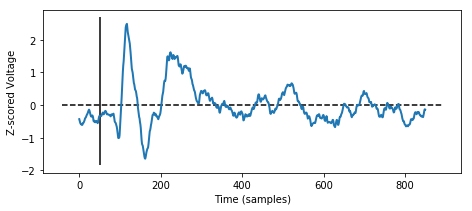

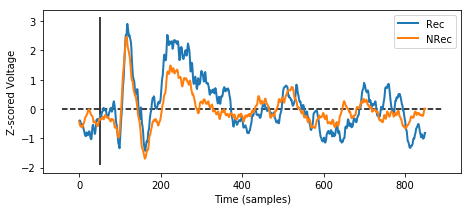

In [204]:
#Load the EEG for encoding events
eeg = reader.load_eeg(events=word_evs, rel_start=-100, rel_stop=1600, scheme=pairs[18:19])  #this is an occipital electrode

#Get recalled/not recalled status
rec_status = word_evs['recalled']

mu = np.mean(np.mean(eeg.data[:, 0, :], 1), 0)
std_ = np.std(np.mean(eeg.data[:, 0, :], 1), 0)

zeeg = (eeg.data-mu)/std_

#Plot the trace averaged across all events
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[:, 0, :], 0), linewidth=2,)
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

#Plot the trace for rec/nrec separately
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[rec_status, 0, :], 0), linewidth=2, label='Rec')
plt.plot(np.mean(zeeg[~rec_status, 0, :], 0), linewidth=2, label='NRec')
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.legend()
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')